In [74]:
!pip install pymc

In [115]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import pymc as pm
import time

In [102]:
arms = [[0, 0], [0, 1], [1, 0], [1, 1]]

# トンプソンサンプリングにロジスティック回帰モデルを導入
class MCMC_GLMTSAgent(object):
    def __init__(self):
        self.counts = [0 for _ in arms]
        self.wins = [0 for _ in arms]
        # 特徴量
        # armsの各メンバに定数1を追加
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T

    def get_arm(self):
        if 0 in self.counts: return self.counts.index(0) # 一度も試したことがない解がある場合は、まずその解を出力
        with pm.Model() as model:
            w = pm.Normal("w", mu = 0, sigma = 10, shape = 3) # 事前分布(多次元正規分布)
            linpred = pm.math.dot(w, self.phis) # 線形予測子
            theta = pm.Deterministic("theta", 1 / (1 + pm.math.exp(-linpred))) # 線形予測子にロジスティック関数をかけて、各解の報酬の期待値を算出
            obs = pm.Binomial("obs", n = self.counts, p = theta, observed = self.wins)
            trace = pm.sample(2000, chains = 1)

        # sample_posterior_predictiveメソッドでsamplesとdrawsが使用できなかったので、全部サンプルしてからランダムに1つサンプル
        pp = pm.sample_posterior_predictive(trace, model = model, var_names = ["theta"])
        pp_theta = pp.posterior_predictive.theta.values
        draw_idx = np.random.randint(pp_theta.shape[1])
        sample = pp_theta[0, draw_idx, ...]

        return np.argmax(sample)

    def sample(self, arm_index, reward):
        self.counts[arm_index] += 1
        self.wins[arm_index] += reward

In [103]:
# 要素間に交互作用のない環境
class Env(object):
    def p(arm):
        x = arm[0] * 0.2 + arm[1] * 0.8 - 4
        p = 1 / (1 + np.exp(-x))
        return p

    def react(arm):
        return 1 if np.random.random() < Env.p(arm) else 0

    def opt():
        return np.argmax([Env.p(arm) for arm in arms])

In [104]:
# シミュレーションの実行
np.random.seed(0)
selected_arms = []
earned_rewards = []
n_step = 20
agent = MCMC_GLMTSAgent()
for step in range(n_step):
    arm_index = agent.get_arm()
    for _ in range(50):
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms.append(arm_index)
        earned_rewards.append(reward)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Output()

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: []


Output()

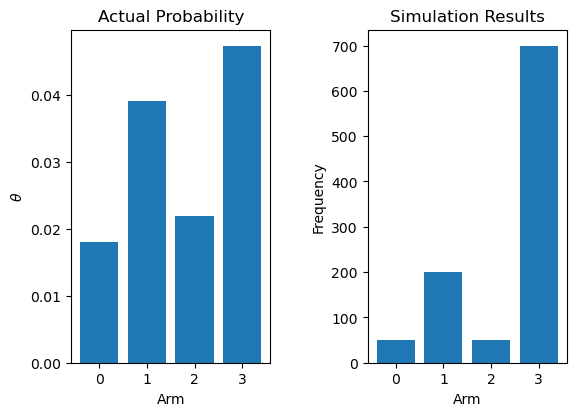

In [106]:
arm_count = [row[1] for row in sorted(Counter(selected_arms).items())]
plt.subplot(1, 2, 1)
plt.bar(range(4), [Env.p(arm) for arm in arms], tick_label = range(4))
plt.xlabel("Arm")
plt.ylabel(r'$\theta$')
plt.title("Actual Probability")
plt.subplot(1, 2, 2)
plt.bar(range(4), arm_count, tick_label = range(4))
plt.xlabel("Arm")
plt.ylabel("Frequency")
plt.title("Simulation Results")
plt.tight_layout(pad = 3)
plt.show()

In [109]:
# LinUCB
class LinUCBAgent(object):
    def __init__(self):
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T
        self.alpha = 1
        self.sigma = 1
        self.A = np.identity(self.phis.shape[0])
        self.b = np.zeros((self.phis.shape[0], 1))

    def get_arm(self):
        inv_A = np.linalg.inv(self.A)
        mu = inv_A.dot(self.b)
        S = inv_A
        pred_mean = self.phis.T.dot(mu)
        pred_var = self.phis.T.dot(S).dot(self.phis)
        ucb = pred_mean.T + self.alpha * np.sqrt(np.diag(pred_var))
        return np.argmax(ucb)

    def sample(self, arm_index, reward):
        phi = self.phis[:, [arm_index]]
        self.b = self.b + phi * reward / (self.sigma ** 2)
        self.A = self.A + phi.dot(phi.T) / (self.sigma ** 2)

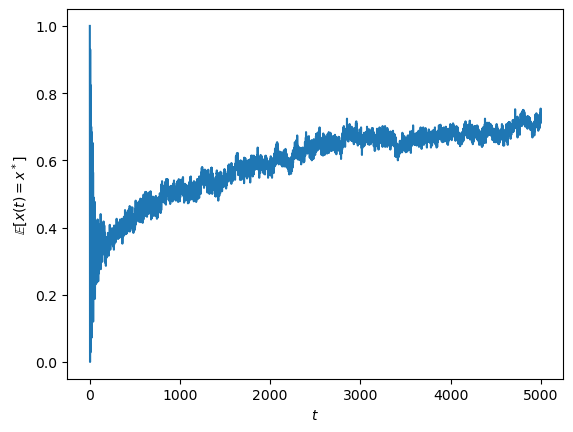

43.03


In [118]:
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, n_step), dtype = int)
earned_rewards = np.zeros((n_iter, n_step), dtype = int)
start = time.perf_counter()

for it in range(n_iter):
    agent = LinUCBAgent()
    for step in range(n_step):
        arm_index = agent.get_arm()
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms[it, step] = arm_index
        earned_rewards[it, step] = reward

end = time.perf_counter()
plt.plot(np.mean(selected_arms == Env.opt(), axis = 0))
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.show()

print('{:.2f}'.format((end-start)))

In [113]:
# LinUCB2
# 逆行列の計算をウッドベリーの公式で回避
class LinUCBAgent2(object):
    def __init__(self):
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T
        self.alpha = 1
        self.sigma = 1
        self.inv_A = np.identity(self.phis.shape[0])
        self.b = np.zeros((self.phis.shape[0], 1))

    def get_arm(self):
        post_mean = self.inv_A.dot(self.b)
        post_var = self.inv_A
        pred_mean = self.phis.T.dot(post_mean)
        pred_var = self.phis.T.dot(post_var).dot(self.phis)
        ucb = pred_mean.T + self.alpha * np.sqrt(np.diag(pred_var))
        return np.argmax(ucb)

    def sample(self, arm_index, reward):
        phi = self.phis[:, [arm_index]]
        iAppTiA = self.inv_A.dot(phi).dot(phi.T).dot(self.inv_A)
        s2_pTiAp = self.sigma ** 2 + phi.T.dot(self.inv_A).dot(phi)
        self.inv_A = self.inv_A - iAppTiA / s2_pTiAp
        self.b = self.b + (self.sigma ** 2) * reward * phi

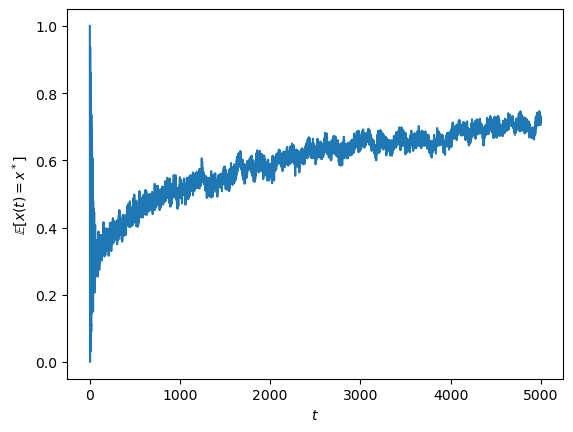

39.52


In [117]:
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, n_step), dtype = int)
earned_rewards = np.zeros((n_iter, n_step), dtype = int)
start = time.perf_counter()

for it in range(n_iter):
    agent = LinUCBAgent2()
    for step in range(n_step):
        arm_index = agent.get_arm()
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms[it, step] = arm_index
        earned_rewards[it, step] = reward

end = time.perf_counter()
plt.plot(np.mean(selected_arms == Env.opt(), axis = 0))
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.show()

print('{:.2f}'.format((end-start)))

In [119]:
# 5章からコピー
class UCBAgent(object):
    def __init__(self):
        self.counts = [0 for _ in range(n_arms)]
        self.values = [0 for _ in range(n_arms)]

    def calc_ucb(self, arm):
        ucb = self.values[arm]
        ucb += np.sqrt(np.log(sum(self.counts)) / (2 * self.counts[arm]))
        return ucb

    def get_arm(self):
        if 0 in self.counts:
            # 1回も選択したことのない解があれば、まずそれを選択
            arm = self.counts.index(0)
        else:
            # UCB値を計算して最大となる解を選択
            ucb = [self.calc_ucb(arm) for arm in range(n_arms)]
            arm = ucb.index(max(ucb))
        return arm

    def sample(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

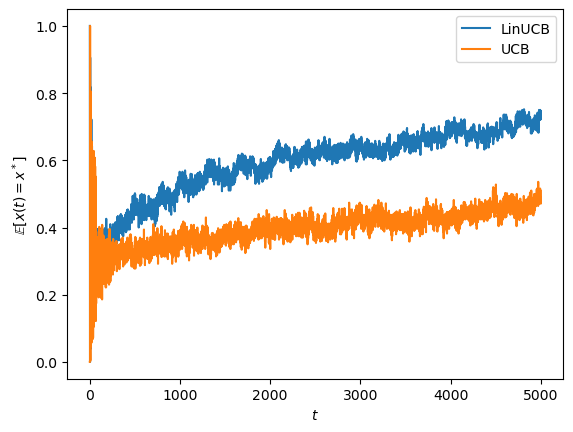

In [120]:
agent_classes = [LinUCBAgent2, UCBAgent]
n_arms = len(arms)
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, len(agent_classes), n_step), dtype = int)
earned_rewards = np.zeros((n_iter, len(agent_classes), n_step), dtype = int)
for it in range(n_iter):
    for i, agent_class in enumerate(agent_classes):
        agent = agent_class()
        for step in range(n_step):
            arm_index = agent.get_arm()
            arm = arms[arm_index]
            reward = Env.react(arm)
            agent.sample(arm_index, reward)
            selected_arms[it, i, step] = arm_index
            earned_rewards[it, i, step] = reward

acc = np.mean(selected_arms == Env.opt(), axis = 0)
plt.plot(acc[0], label = "LinUCB")
plt.plot(acc[1], label = "UCB")
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show()

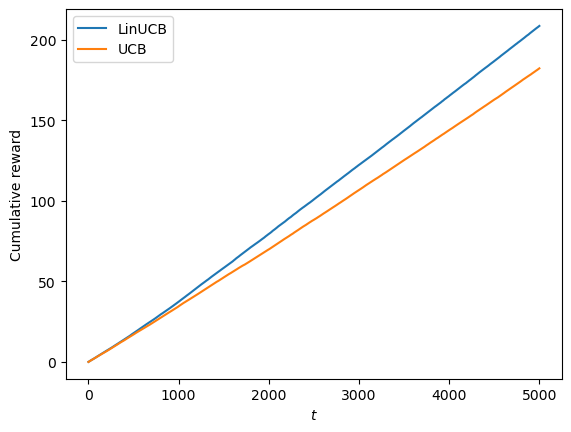

In [122]:
plt.plot(np.mean(np.cumsum(earned_rewards, axis = 2), axis = 0)[0], label = "LinUCB")
plt.plot(np.mean(np.cumsum(earned_rewards, axis = 2), axis = 0)[1], label = "UCB")
plt.xlabel(r'$t$')
plt.ylabel(r'Cumulative reward')
plt.legend()
plt.show()